## setup ##

In [1]:
!pip install selenium

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl


In [4]:
import numpy as np
import pandas as pd
from selenium import webdriver
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

## dataframe

In [5]:
cols = ['company', 'title', 'desc', 'salary', 'location', 'rating', 'review','comp_size', 'tags', 'funding', 'contact', 'skills']


## selenium setup

In [7]:
browser = webdriver.Chrome('C:/Program Files (x86)/chromedriver.exe')

In [9]:
browser.get('https://angel.co/jobs#find/f!%7B%22locations%22%3A%5B%221688-United%20States%22%5D%2C%22roles%22%3A%5B%22Data%20Scientist%22%5D%7D')
time.sleep(2)

In [10]:
import getpass
browser.find_element_by_xpath('//*[@id="root"]/div[2]/div/div/div/div[1]/div/div/a[2]').click()
time.sleep(1)

In [14]:
email = input('Email: ')
password = getpass.getpass('Password: ')

Email: caneale320@gmail.com
Password: ········


In [15]:
# input email and password
browser.find_element_by_xpath('//*[@id="user_email"]').send_keys(email)
browser.find_element_by_xpath('//*[@id="user_password"]').send_keys(password)
time.sleep(2)

In [17]:
# click login
browser.find_element_by_xpath('//*[@id="new_user"]/div[2]/input').click()
time.sleep(2)


In [58]:
# remove virginia filter
browser.find_element_by_xpath('//*[@id="startups_content"]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[2]/div[1]/img').click()
time.sleep(2)

In [59]:
# remove internship filter 
browser.find_element_by_xpath('//*[@id="startups_content"]/div[1]/div[2]/div[1]/div[1]/div[1]/div[1]/div[2]/div[2]/img').click()
time.sleep(2)


In [61]:
# add US filter
browser.find_element_by_xpath('//*[@id="startups_content"]/div[1]/div[2]/div[1]/div[1]/div[3]/div[3]').click()
browser.find_element_by_xpath('//*[@id="startups_content"]/div[1]/div[2]/div[1]/div[1]/div[3]/div[3]/div/div[5]').click()
time.sleep(3)



In [81]:
# job_list = browser.find_element_by_class_name('//*[@id="startups_content"]/div[1]/div[5]').find_elements_by_class_name('header-info')
# job_list

InvalidSelectorException: Message: invalid selector: An invalid or illegal class name was specified
  (Session info: chrome=74.0.3729.169)
  (Driver info: chromedriver=74.0.3729.6 (255758eccf3d244491b8a1317aa76e1ce10d57e9-refs/branch-heads/3729@{#29}),platform=Windows NT 10.0.17134 x86_64)


In [111]:
# generate list of jobs
job_list = browser.find_element_by_class_name('startup-container').find_elements_by_class_name('header-info')
len(job_list)

694

In [83]:
# check result of nonpresent attribute
job_list[0].find_element_by_class_name('tagline').get_attribute('innerHTML')


''

In [113]:
# expand all job listings to access all info 

for job in job_list:
    job.click()
#     title.append(job.find_element_by_class_name('startup-link').get_attribute('innerHTML'))
#     subtitle.append(job.find_element_by_class_name('tagline').get_attribute('innerHTML'))
#     comp_size.append(job.find_element_by_class_name('employees').get_attribute('innerHTML'))
#     comp_size.append(job.find_element_by_class_name('locations').get_attribute('innerHTML'))


In [109]:
# scroll entire webpage to load all elements
element = browser.find_element_by_id("root_footer")
n=0
while n<100:
    browser.execute_script("arguments[0].scrollIntoView();", element)
    time.sleep(2)
    n +=1

In [142]:
company = []
title = []
subtitle = []
desc = []
salary = []
location = []
rating = []
review = []
comp_size = []
tags = []
funding = []
contact = []
skills = []

expanded_jobs = browser.find_element_by_class_name('startup-container').find_elements_by_class_name('browse_startups_table_row')

for job in expanded_jobs:
    try:
        company.append(job.find_element_by_class_name('startup-link').text)
    except:
        company.append(None)
    try:
        subtitle.append(job.find_element_by_class_name('tagline').text)
    except:
        subtitle.append(None)
    try:
        comp_size.append(job.find_element_by_class_name('employees').text)
    except:
        comp_size.append(None)
    try:
        location.append(job.find_element_by_class_name('locations').text)
    except:
        location.append(None)
    try:
        title.append(job.find_element_by_class_name('title').text)
    except:
        title.append(None)
    try:
        desc.append(job.find_element_by_class_name('description').text)
    except:
        desc.append(None)
    try:
        salary.append(job.find_element_by_class_name('compensation').text)
    except:
        salary.append(None)
    try:
        tags.append(job.find_element_by_class_name('tags').text)
    except:
        tags.append(None)
    try:
        contact.append(job.find_element_by_class_name('website-link').text)
    except:
        contact.append(None)


In [141]:
expanded_jobs[100].find_element_by_class_name('locations').text

'Los Angeles, San Francisco Bay Area, New York City'

In [151]:
#create none lists for data which is not present

rating = ([None] * len(company))
review = ([None] * len(company))
funding = ([None] * len(company))
skills = ([None] * len(company))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [156]:
data = pd.DataFrame({'company':company, 'title':title, 'subtitle':subtitle, "desc":desc, 'compensation':salary, 'location':location, 'rating':rating, 'review':review, 'comp_size':comp_size, 'tags':tags, 'funding':funding, 'contact':contact, 'skills':skills})

In [157]:
data

,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills
0,SecureStream Technologes,Data Scientist,,We bring Privacy and Security to the IoT (Inte...,$100k – $150k · 0.0% – 10.0%,Silicon Valley,None,None,1-10 employees,Full Time · Silicon Valley · Data Scientist · ...,None,None,None
1,Pangaea,Analytics Intern (SQL + Python + Excel),"International, premium D2C products","We sell international-focused, premium consume...",$5k – $10k · No equity,Los Angeles,None,None,11-50 employees,Internship · Los Angeles · Data Scientist,None,pangaea.holdings,None
2,SteelNow,Head of Business Intelligence (Founding Employ...,A Better Metal Buying Experience,We are focused on getting you what you need ri...,$110k – $130k · No equity,Dallas,None,None,1-10 employees,Full Time · Dallas · Software Engineer · Data ...,None,steelnow.co,None
3,The TIE,"Interns (Marketing, PR, Product Development, D...",Predictive Sentiment Analytics and Fundamental...,The TIE is the first product to combine instit...,$4k – $12k · No equity,New York City,None,None,1-10 employees,Internship · New York City · Designer · UI/UX ...,None,thetie.io,None
4,Reify Health,Data Engineer (Semantic Knowledge Management),Building a more creative healthcare system.,Our healthcare system relies on clinical trial...,$100k – $150k · 0.01% – 0.1%,Boston,None,None,11-50 employees,Full Time · Remote possible · Boston · Softwar...,None,reifyhealth.com,None
5,neoEYED,7+ Years Data Scientist for next-generation au...,Kill the password,neoEYED is a package you install in your mobil...,$40k – $120k · 0.0% – 2.0%,"Bengaluru, Latvia, Europe, Delaware, India",None,None,1-10 employees,Full Time · Remote possible · Bengaluru · Dela...,None,killthepassword.com,None
6,DiscoverOrg,Principal Data Engineer,SaaS - Business Intelligence and predictive an...,"For a decade, DiscoverOrg has stood alone in t...",$100k – $130k · No equity,"Vancouver, Bethesda, Bellevue, Portland",None,None,501-1000 employees,Full Time · Vancouver · Portland · Data Scient...,None,discoverorg.com,None
7,Integrated Resources Inc ( IRI ),QA Documentation Specialist,"IRI believes in commitment, integrity and stra...",Staffing and Solutions,$70k – $75k · No equity,"Milwaukee, La Verne, Edison, Remote, Chicago, ...",None,None,501-1000 employees,Contract · La Verne · Data Scientist,None,irionline.com,None
8,Product School,"Data Analytics Instructor (5 hours/week), San ...",Certified product management courses in-person...,"Founded in Silicon Valley in 2014, Product Sch...",$90k – $150k · No equity,"San Francisco, San Francisco Bay Area, New Yor...",None,None,51-200 employees,Contract · San Francisco · San Francisco Bay A...,None,productschool.com,None
9,MatSci AI,DB Engineer,The AI Enabled Research Ecosystem,MatSci AI is a unique ecosystem that bridges f...,"₹15,000 – ₹20,000 · No equity","India, United States",None,None,1-10 employees,Internship · Remote possible · India · United ...,None,matsci.ai,None


# Cleaning

In [162]:
data.iloc[5,5]

'Bengaluru, Latvia, Europe, Delaware, India'

In [337]:
datacopy = data
datacopy.to_csv(r'C:\Users\canea\Desktop\datascience_scraping.csv', index = None, header=True)

In [674]:
data = pd.read_csv(r'C:\Users\canea\Desktop\datascience_scraping.csv')
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,salary,skills,software_eng,subtitle,tags,title
0,1-10 employees,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,['Silicon Valley'],NaN,NaN,$100k – $150k,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist
1,11-50 employees,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,['Los Angeles'],NaN,NaN,$5k – $10k,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel)
2,1-10 employees,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,['Dallas'],NaN,NaN,$110k – $130k,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...
3,1-10 employees,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,['New York City'],NaN,NaN,$4k – $12k,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D..."
4,11-50 employees,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,['Boston'],NaN,NaN,$100k – $150k,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management)
5,1-10 employees,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"['Bengaluru', ' Latvia', ' Europe', ' Delaware...",NaN,NaN,$40k – $120k,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...
6,501-1000 employees,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"['Vancouver', ' Bethesda', ' Bellevue', ' Port...",NaN,NaN,$100k – $130k,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer
7,501-1000 employees,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"['Milwaukee', ' La Verne', ' Edison', ' Remote...",NaN,NaN,$70k – $75k,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist
8,51-200 employees,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"['San Francisco', ' San Francisco Bay Area', '...",NaN,NaN,$90k – $150k,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ..."
9,1-10 employees,MatSci AI,matsci.ai,False,True,MatSci AI is a unique ecosystem that bridges f...,No equity,NaN,False,"['India', ' United States']",NaN,NaN,"₹15,000 – ₹20,000",NaN,False,The AI Enabled Research Ecosystem,Internship · Remote possible · India · United ...,DB Engineer


In [675]:
data.location = data.location.str.split(',')

In [676]:
data['internship'] = data['title'].str.contains('intern', case=False)

In [677]:
def get_element(my_list, position):
    return my_list[position]

In [678]:
# data['compensation'].str.split('·')[0][1]

KeyError: 'compensation'

In [217]:
new = data['compensation'].str.split('·', expand=True)
data['salary'] = new[0]
data['equity'] = new[1]

In [679]:
data = data.drop('compensation', axis=1)

KeyError: "['compensation'] not found in axis"

In [221]:
data

,company,title,subtitle,desc,location,rating,review,comp_size,tags,funding,contact,skills,internship,salary,equity
0,SecureStream Technologes,Data Scientist,,We bring Privacy and Security to the IoT (Inte...,[Silicon Valley],None,None,1-10 employees,Full Time · Silicon Valley · Data Scientist · ...,None,None,None,False,$100k – $150k,0.0% – 10.0%
1,Pangaea,Analytics Intern (SQL + Python + Excel),"International, premium D2C products","We sell international-focused, premium consume...",[Los Angeles],None,None,11-50 employees,Internship · Los Angeles · Data Scientist,None,pangaea.holdings,None,True,$5k – $10k,No equity
2,SteelNow,Head of Business Intelligence (Founding Employ...,A Better Metal Buying Experience,We are focused on getting you what you need ri...,[Dallas],None,None,1-10 employees,Full Time · Dallas · Software Engineer · Data ...,None,steelnow.co,None,False,$110k – $130k,No equity
3,The TIE,"Interns (Marketing, PR, Product Development, D...",Predictive Sentiment Analytics and Fundamental...,The TIE is the first product to combine instit...,[New York City],None,None,1-10 employees,Internship · New York City · Designer · UI/UX ...,None,thetie.io,None,True,$4k – $12k,No equity
4,Reify Health,Data Engineer (Semantic Knowledge Management),Building a more creative healthcare system.,Our healthcare system relies on clinical trial...,[Boston],None,None,11-50 employees,Full Time · Remote possible · Boston · Softwar...,None,reifyhealth.com,None,False,$100k – $150k,0.01% – 0.1%
5,neoEYED,7+ Years Data Scientist for next-generation au...,Kill the password,neoEYED is a package you install in your mobil...,"[Bengaluru, Latvia, Europe, Delaware, India]",None,None,1-10 employees,Full Time · Remote possible · Bengaluru · Dela...,None,killthepassword.com,None,False,$40k – $120k,0.0% – 2.0%
6,DiscoverOrg,Principal Data Engineer,SaaS - Business Intelligence and predictive an...,"For a decade, DiscoverOrg has stood alone in t...","[Vancouver, Bethesda, Bellevue, Portland]",None,None,501-1000 employees,Full Time · Vancouver · Portland · Data Scient...,None,discoverorg.com,None,False,$100k – $130k,No equity
7,Integrated Resources Inc ( IRI ),QA Documentation Specialist,"IRI believes in commitment, integrity and stra...",Staffing and Solutions,"[Milwaukee, La Verne, Edison, Remote, Chic...",None,None,501-1000 employees,Contract · La Verne · Data Scientist,None,irionline.com,None,False,$70k – $75k,No equity
8,Product School,"Data Analytics Instructor (5 hours/week), San ...",Certified product management courses in-person...,"Founded in Silicon Valley in 2014, Product Sch...","[San Francisco, San Francisco Bay Area, New ...",None,None,51-200 employees,Contract · San Francisco · San Francisco Bay A...,None,productschool.com,None,False,$90k – $150k,No equity
9,MatSci AI,DB Engineer,The AI Enabled Research Ecosystem,MatSci AI is a unique ecosystem that bridges f...,"[India, United States]",None,None,1-10 employees,Internship · Remote possible · India · United ...,None,matsci.ai,None,False,"₹15,000 – ₹20,000",No equity


# software jobs

In [233]:
# scroll entire webpage to load all elements
element = browser.find_element_by_id("root_footer")
n=0
while n<400:
    browser.execute_script("arguments[0].scrollIntoView();", element)
    time.sleep(2)
    n +=1

KeyboardInterrupt: 

In [234]:
# generate list of jobs
job_list = browser.find_element_by_class_name('startup-container').find_elements_by_class_name('header-info')
len(job_list)

2000

In [83]:
# check result of nonpresent attribute
job_list[0].find_element_by_class_name('tagline').get_attribute('innerHTML')


''

In [235]:
# expand all jojb listings to access all info 

for job in job_list:
    job.click()
#     title.append(job.find_element_by_class_name('startup-link').get_attribute('innerHTML'))
#     subtitle.append(job.find_element_by_class_name('tagline').get_attribute('innerHTML'))
#     comp_size.append(job.find_element_by_class_name('employees').get_attribute('innerHTML'))
#     comp_size.append(job.find_element_by_class_name('locations').get_attribute('innerHTML'))


In [236]:
company = []
title = []
subtitle = []
desc = []
salary = []
location = []
rating = []
review = []
comp_size = []
tags = []
funding = []
contact = []
skills = []

expanded_jobs = browser.find_element_by_class_name('startup-container').find_elements_by_class_name('browse_startups_table_row')

for job in expanded_jobs:
    try:
        company.append(job.find_element_by_class_name('startup-link').text)
    except:
        company.append(None)
    try:
        subtitle.append(job.find_element_by_class_name('tagline').text)
    except:
        subtitle.append(None)
    try:
        comp_size.append(job.find_element_by_class_name('employees').text)
    except:
        comp_size.append(None)
    try:
        location.append(job.find_element_by_class_name('locations').text)
    except:
        location.append(None)
    try:
        title.append(job.find_element_by_class_name('title').text)
    except:
        title.append(None)
    try:
        desc.append(job.find_element_by_class_name('description').text)
    except:
        desc.append(None)
    try:
        salary.append(job.find_element_by_class_name('compensation').text)
    except:
        salary.append(None)
    try:
        tags.append(job.find_element_by_class_name('tags').text)
    except:
        tags.append(None)
    try:
        contact.append(job.find_element_by_class_name('website-link').text)
    except:
        contact.append(None)


In [240]:
#create none lists for data which is not present

rating = ([None] * len(company))
review = ([None] * len(company))
funding = ([None] * len(company))
skills = ([None] * len(company))

In [241]:
data_SE = pd.DataFrame({'company':company, 'title':title, 'subtitle':subtitle, "desc":desc, 'compensation':salary, 'location':location, 'rating':rating, 'review':review, 'comp_size':comp_size, 'tags':tags, 'funding':funding, 'contact':contact, 'skills':skills})

In [242]:
data_SE

,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills
0,Titan (YC S18),,"Built like a hedge fund, we're the high-qualit...",,,New York City,None,None,1-10 employees,,None,,None
1,Kango,Software Engineer - Mobile,Rides and Care for Kids (500 Startups Batch 9),"Kango is a unique, best-in-class ridesharing s...",$70k – $120k · 0.0% – 0.5%,"San Mateo, San Francisco Bay Area",None,None,1-10 employees,Full Time · San Mateo · Mobile Developer · Fro...,None,kangoapp.co,None
2,Point One Navigation,Senior Embedded Software Engineer,Precise Location as a Service,Point One Navigation is building a precise loc...,$130k – $150k · 0.0% – 0.2%,San Francisco,None,None,11-50 employees,Full Time · San Francisco · Software Engineer ...,None,pointonenav.com,None
3,i.am+,Sr DevOps Engineer,wearables from The Future,Founded by innovator & global music artist wil...,$140k – $170k · 0.0% – 0.001%,Los Angeles,None,None,51-200 employees,Full Time · Los Angeles · DevOps · Docker · An...,None,iamplus.com,None
4,Dealer Teamwork,Senior / Lead Developer,,None,$100k – $115k · No equity,Eden Prairie,None,None,51-200 employees,Full Time · Eden Prairie · Full-Stack Develope...,None,None,None
5,Gamesight,Software Engineer,The Marketing Platform for PC & Console games,Gamesight builds technology to help kickass ga...,$60k – $100k · 0.0% – 1.0%,Seattle,None,None,11-50 employees,Full Time · Seattle · Software Engineer · Pyth...,None,gamesight.io,None
6,Shareaholic,Software Engineer,The world's leading all-in-one Content Amplifi...,Shareaholic is transforming the way content is...,$40k – $120k · 0.01% – 0.1%,Boston,None,None,11-50 employees,Full Time · Remote possible · Boston · Softwar...,None,shareaholic.com,None
7,Cloudsnap,QA Engineering,We help companies connect their ERP to the app...,Seamlessly connect your enterprise application...,$65k – $75k · No equity,Austin,None,None,11-50 employees,Full Time · Austin · QA Engineer · Software Te...,None,cloudsnap.com,None
8,Moment,Software Engineer,"Photography gear, travel, and inspiration. You...","We make gear, develop apps, and guide trips th...",$85k – $115k · 0.5% – 0.75%,"Seattle, Remote",None,None,11-50 employees,Full Time · Remote possible · Seattle · Softwa...,None,shopmoment.com,None
9,SumZero,Senior Developer,"Online community for hedge fund, mutual fund, ...",SumZero is the world's largest community of in...,$100k – $180k · No equity,New York City,None,None,11-50 employees,Full Time · New York City · Software Engineer ...,None,sumzero.com,None


In [243]:
data_SE.to_csv(r'C:\Users\canea\Desktop\SE_scraping.csv', index = None, header=True)

In [681]:
data_SE = pd.read_csv(r'C:\Users\canea\Desktop\SE_scraping.csv')

In [695]:
data_SE['data_eng'] = data_SE['subtitle'].str.contains('data') | data_SE['title'].str.contains('data')
data_SE

,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills,data_eng
0,Titan (YC S18),NaN,"Built like a hedge fund, we're the high-qualit...",NaN,NaN,New York City,NaN,NaN,1-10 employees,NaN,NaN,NaN,NaN,False
1,Kango,Software Engineer - Mobile,Rides and Care for Kids (500 Startups Batch 9),"Kango is a unique, best-in-class ridesharing s...",$70k – $120k · 0.0% – 0.5%,"San Mateo, San Francisco Bay Area",NaN,NaN,1-10 employees,Full Time · San Mateo · Mobile Developer · Fro...,NaN,kangoapp.co,NaN,False
2,Point One Navigation,Senior Embedded Software Engineer,Precise Location as a Service,Point One Navigation is building a precise loc...,$130k – $150k · 0.0% – 0.2%,San Francisco,NaN,NaN,11-50 employees,Full Time · San Francisco · Software Engineer ...,NaN,pointonenav.com,NaN,False
3,i.am+,Sr DevOps Engineer,wearables from The Future,Founded by innovator & global music artist wil...,$140k – $170k · 0.0% – 0.001%,Los Angeles,NaN,NaN,51-200 employees,Full Time · Los Angeles · DevOps · Docker · An...,NaN,iamplus.com,NaN,False
4,Dealer Teamwork,Senior / Lead Developer,NaN,NaN,$100k – $115k · No equity,Eden Prairie,NaN,NaN,51-200 employees,Full Time · Eden Prairie · Full-Stack Develope...,NaN,NaN,NaN,False
5,Gamesight,Software Engineer,The Marketing Platform for PC & Console games,Gamesight builds technology to help kickass ga...,$60k – $100k · 0.0% – 1.0%,Seattle,NaN,NaN,11-50 employees,Full Time · Seattle · Software Engineer · Pyth...,NaN,gamesight.io,NaN,False
6,Shareaholic,Software Engineer,The world's leading all-in-one Content Amplifi...,Shareaholic is transforming the way content is...,$40k – $120k · 0.01% – 0.1%,Boston,NaN,NaN,11-50 employees,Full Time · Remote possible · Boston · Softwar...,NaN,shareaholic.com,NaN,False
7,Cloudsnap,QA Engineering,We help companies connect their ERP to the app...,Seamlessly connect your enterprise application...,$65k – $75k · No equity,Austin,NaN,NaN,11-50 employees,Full Time · Austin · QA Engineer · Software Te...,NaN,cloudsnap.com,NaN,False
8,Moment,Software Engineer,"Photography gear, travel, and inspiration. You...","We make gear, develop apps, and guide trips th...",$85k – $115k · 0.5% – 0.75%,"Seattle, Remote",NaN,NaN,11-50 employees,Full Time · Remote possible · Seattle · Softwa...,NaN,shopmoment.com,NaN,False
9,SumZero,Senior Developer,"Online community for hedge fund, mutual fund, ...",SumZero is the world's largest community of in...,$100k – $180k · No equity,New York City,NaN,NaN,11-50 employees,Full Time · New York City · Software Engineer ...,NaN,sumzero.com,NaN,False


In [693]:
type(data_SE['data_eng'][1])


,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills,data_eng
0,Titan (YC S18),NaN,"Built like a hedge fund, we're the high-qualit...",NaN,NaN,New York City,NaN,NaN,1-10 employees,NaN,NaN,NaN,NaN,False
1,Kango,Software Engineer - Mobile,Rides and Care for Kids (500 Startups Batch 9),"Kango is a unique, best-in-class ridesharing s...",$70k – $120k · 0.0% – 0.5%,"San Mateo, San Francisco Bay Area",NaN,NaN,1-10 employees,Full Time · San Mateo · Mobile Developer · Fro...,NaN,kangoapp.co,NaN,False
2,Point One Navigation,Senior Embedded Software Engineer,Precise Location as a Service,Point One Navigation is building a precise loc...,$130k – $150k · 0.0% – 0.2%,San Francisco,NaN,NaN,11-50 employees,Full Time · San Francisco · Software Engineer ...,NaN,pointonenav.com,NaN,False
3,i.am+,Sr DevOps Engineer,wearables from The Future,Founded by innovator & global music artist wil...,$140k – $170k · 0.0% – 0.001%,Los Angeles,NaN,NaN,51-200 employees,Full Time · Los Angeles · DevOps · Docker · An...,NaN,iamplus.com,NaN,False
4,Dealer Teamwork,Senior / Lead Developer,NaN,NaN,$100k – $115k · No equity,Eden Prairie,NaN,NaN,51-200 employees,Full Time · Eden Prairie · Full-Stack Develope...,NaN,NaN,NaN,NaN
5,Gamesight,Software Engineer,The Marketing Platform for PC & Console games,Gamesight builds technology to help kickass ga...,$60k – $100k · 0.0% – 1.0%,Seattle,NaN,NaN,11-50 employees,Full Time · Seattle · Software Engineer · Pyth...,NaN,gamesight.io,NaN,False
6,Shareaholic,Software Engineer,The world's leading all-in-one Content Amplifi...,Shareaholic is transforming the way content is...,$40k – $120k · 0.01% – 0.1%,Boston,NaN,NaN,11-50 employees,Full Time · Remote possible · Boston · Softwar...,NaN,shareaholic.com,NaN,False
7,Cloudsnap,QA Engineering,We help companies connect their ERP to the app...,Seamlessly connect your enterprise application...,$65k – $75k · No equity,Austin,NaN,NaN,11-50 employees,Full Time · Austin · QA Engineer · Software Te...,NaN,cloudsnap.com,NaN,False
8,Moment,Software Engineer,"Photography gear, travel, and inspiration. You...","We make gear, develop apps, and guide trips th...",$85k – $115k · 0.5% – 0.75%,"Seattle, Remote",NaN,NaN,11-50 employees,Full Time · Remote possible · Seattle · Softwa...,NaN,shopmoment.com,NaN,False
9,SumZero,Senior Developer,"Online community for hedge fund, mutual fund, ...",SumZero is the world's largest community of in...,$100k – $180k · No equity,New York City,NaN,NaN,11-50 employees,Full Time · New York City · Software Engineer ...,NaN,sumzero.com,NaN,False


In [696]:
data_SE['software_eng'] = ~data_SE['data_eng']
data_SE['data_science'] = [False] * len(data_SE)
data_SE

,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills,data_eng,software_eng,data_science
0,Titan (YC S18),NaN,"Built like a hedge fund, we're the high-qualit...",NaN,NaN,New York City,NaN,NaN,1-10 employees,NaN,NaN,NaN,NaN,False,True,False
1,Kango,Software Engineer - Mobile,Rides and Care for Kids (500 Startups Batch 9),"Kango is a unique, best-in-class ridesharing s...",$70k – $120k · 0.0% – 0.5%,"San Mateo, San Francisco Bay Area",NaN,NaN,1-10 employees,Full Time · San Mateo · Mobile Developer · Fro...,NaN,kangoapp.co,NaN,False,True,False
2,Point One Navigation,Senior Embedded Software Engineer,Precise Location as a Service,Point One Navigation is building a precise loc...,$130k – $150k · 0.0% – 0.2%,San Francisco,NaN,NaN,11-50 employees,Full Time · San Francisco · Software Engineer ...,NaN,pointonenav.com,NaN,False,True,False
3,i.am+,Sr DevOps Engineer,wearables from The Future,Founded by innovator & global music artist wil...,$140k – $170k · 0.0% – 0.001%,Los Angeles,NaN,NaN,51-200 employees,Full Time · Los Angeles · DevOps · Docker · An...,NaN,iamplus.com,NaN,False,True,False
4,Dealer Teamwork,Senior / Lead Developer,NaN,NaN,$100k – $115k · No equity,Eden Prairie,NaN,NaN,51-200 employees,Full Time · Eden Prairie · Full-Stack Develope...,NaN,NaN,NaN,False,True,False
5,Gamesight,Software Engineer,The Marketing Platform for PC & Console games,Gamesight builds technology to help kickass ga...,$60k – $100k · 0.0% – 1.0%,Seattle,NaN,NaN,11-50 employees,Full Time · Seattle · Software Engineer · Pyth...,NaN,gamesight.io,NaN,False,True,False
6,Shareaholic,Software Engineer,The world's leading all-in-one Content Amplifi...,Shareaholic is transforming the way content is...,$40k – $120k · 0.01% – 0.1%,Boston,NaN,NaN,11-50 employees,Full Time · Remote possible · Boston · Softwar...,NaN,shareaholic.com,NaN,False,True,False
7,Cloudsnap,QA Engineering,We help companies connect their ERP to the app...,Seamlessly connect your enterprise application...,$65k – $75k · No equity,Austin,NaN,NaN,11-50 employees,Full Time · Austin · QA Engineer · Software Te...,NaN,cloudsnap.com,NaN,False,True,False
8,Moment,Software Engineer,"Photography gear, travel, and inspiration. You...","We make gear, develop apps, and guide trips th...",$85k – $115k · 0.5% – 0.75%,"Seattle, Remote",NaN,NaN,11-50 employees,Full Time · Remote possible · Seattle · Softwa...,NaN,shopmoment.com,NaN,False,True,False
9,SumZero,Senior Developer,"Online community for hedge fund, mutual fund, ...",SumZero is the world's largest community of in...,$100k – $180k · No equity,New York City,NaN,NaN,11-50 employees,Full Time · New York City · Software Engineer ...,NaN,sumzero.com,NaN,False,True,False


In [697]:
searchfor = ['engineer', 'software']
data['data_eng'] = data['subtitle'].str.contains('|'.join(searchfor)) | data['title'].str.contains('|'.join(searchfor))

In [698]:
data['data_science'] = ~data['data_eng']

In [699]:
data['software_eng'] = [False] * len(data)

In [700]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,salary,skills,software_eng,subtitle,tags,title
0,1-10 employees,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,[['Silicon Valley']],NaN,NaN,$100k – $150k,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist
1,11-50 employees,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,[['Los Angeles']],NaN,NaN,$5k – $10k,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel)
2,1-10 employees,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,[['Dallas']],NaN,NaN,$110k – $130k,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...
3,1-10 employees,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,[['New York City']],NaN,NaN,$4k – $12k,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D..."
4,11-50 employees,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,[['Boston']],NaN,NaN,$100k – $150k,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management)
5,1-10 employees,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",NaN,NaN,$40k – $120k,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...
6,501-1000 employees,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",NaN,NaN,$100k – $130k,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer
7,501-1000 employees,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",NaN,NaN,$70k – $75k,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist
8,51-200 employees,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"[['San Francisco', ' San Francisco Bay Area',...",NaN,NaN,$90k – $150k,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ..."
9,1-10 employees,MatSci AI,matsci.ai,False,True,MatSci AI is a unique ecosystem that bridges f...,No equity,NaN,False,"[['India', ' United States']]",NaN,NaN,"₹15,000 – ₹20,000",NaN,False,The AI Enabled Research Ecosystem,Internship · Remote possible · India · United ...,DB Engineer


In [701]:
data_SE['internship'] = data_SE['title'].str.contains('intern', case=False)

In [702]:
data_SE

,company,title,subtitle,desc,compensation,location,rating,review,comp_size,tags,funding,contact,skills,data_eng,software_eng,data_science,internship
0,Titan (YC S18),NaN,"Built like a hedge fund, we're the high-qualit...",NaN,NaN,New York City,NaN,NaN,1-10 employees,NaN,NaN,NaN,NaN,False,True,False,NaN
1,Kango,Software Engineer - Mobile,Rides and Care for Kids (500 Startups Batch 9),"Kango is a unique, best-in-class ridesharing s...",$70k – $120k · 0.0% – 0.5%,"San Mateo, San Francisco Bay Area",NaN,NaN,1-10 employees,Full Time · San Mateo · Mobile Developer · Fro...,NaN,kangoapp.co,NaN,False,True,False,False
2,Point One Navigation,Senior Embedded Software Engineer,Precise Location as a Service,Point One Navigation is building a precise loc...,$130k – $150k · 0.0% – 0.2%,San Francisco,NaN,NaN,11-50 employees,Full Time · San Francisco · Software Engineer ...,NaN,pointonenav.com,NaN,False,True,False,False
3,i.am+,Sr DevOps Engineer,wearables from The Future,Founded by innovator & global music artist wil...,$140k – $170k · 0.0% – 0.001%,Los Angeles,NaN,NaN,51-200 employees,Full Time · Los Angeles · DevOps · Docker · An...,NaN,iamplus.com,NaN,False,True,False,False
4,Dealer Teamwork,Senior / Lead Developer,NaN,NaN,$100k – $115k · No equity,Eden Prairie,NaN,NaN,51-200 employees,Full Time · Eden Prairie · Full-Stack Develope...,NaN,NaN,NaN,False,True,False,False
5,Gamesight,Software Engineer,The Marketing Platform for PC & Console games,Gamesight builds technology to help kickass ga...,$60k – $100k · 0.0% – 1.0%,Seattle,NaN,NaN,11-50 employees,Full Time · Seattle · Software Engineer · Pyth...,NaN,gamesight.io,NaN,False,True,False,False
6,Shareaholic,Software Engineer,The world's leading all-in-one Content Amplifi...,Shareaholic is transforming the way content is...,$40k – $120k · 0.01% – 0.1%,Boston,NaN,NaN,11-50 employees,Full Time · Remote possible · Boston · Softwar...,NaN,shareaholic.com,NaN,False,True,False,False
7,Cloudsnap,QA Engineering,We help companies connect their ERP to the app...,Seamlessly connect your enterprise application...,$65k – $75k · No equity,Austin,NaN,NaN,11-50 employees,Full Time · Austin · QA Engineer · Software Te...,NaN,cloudsnap.com,NaN,False,True,False,False
8,Moment,Software Engineer,"Photography gear, travel, and inspiration. You...","We make gear, develop apps, and guide trips th...",$85k – $115k · 0.5% – 0.75%,"Seattle, Remote",NaN,NaN,11-50 employees,Full Time · Remote possible · Seattle · Softwa...,NaN,shopmoment.com,NaN,False,True,False,False
9,SumZero,Senior Developer,"Online community for hedge fund, mutual fund, ...",SumZero is the world's largest community of in...,$100k – $180k · No equity,New York City,NaN,NaN,11-50 employees,Full Time · New York City · Software Engineer ...,NaN,sumzero.com,NaN,False,True,False,False


In [703]:
new = data_SE['compensation'].str.split('·', expand=True)
data_SE['salary'] = new[0]
data_SE['equity'] = new[1]

In [704]:
data_SE = data_SE.drop('compensation', axis=1)

In [705]:
data_SE.location = data_SE.location.str.split(',')

In [706]:
data = data.drop('software', axis=1)

KeyError: "['software'] not found in axis"

In [707]:
data = data.append(data_SE)

C:\Users\canea\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [709]:
data.comp_size.value_counts()
# data_copy = data.copy(True)

1-10 employees         2176
11-50 employees        1833
51-200 employees        424
201-500 employees       103
                         68
501-1000 employees       58
1001-5000 employees      31
5000+ employees          21
Name: comp_size, dtype: int64

In [710]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,salary,skills,software_eng,subtitle,tags,title
0,1-10 employees,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,[['Silicon Valley']],NaN,NaN,$100k – $150k,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist
1,11-50 employees,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,[['Los Angeles']],NaN,NaN,$5k – $10k,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel)
2,1-10 employees,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,[['Dallas']],NaN,NaN,$110k – $130k,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...
3,1-10 employees,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,[['New York City']],NaN,NaN,$4k – $12k,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D..."
4,11-50 employees,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,[['Boston']],NaN,NaN,$100k – $150k,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management)
5,1-10 employees,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",NaN,NaN,$40k – $120k,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...
6,501-1000 employees,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",NaN,NaN,$100k – $130k,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer
7,501-1000 employees,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",NaN,NaN,$70k – $75k,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist
8,51-200 employees,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"[['San Francisco', ' San Francisco Bay Area',...",NaN,NaN,$90k – $150k,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ..."
9,1-10 employees,MatSci AI,matsci.ai,False,True,MatSci AI is a unique ecosystem that bridges f...,No equity,NaN,False,"[['India', ' United States']]",NaN,NaN,"₹15,000 – ₹20,000",NaN,False,The AI Enabled Research Ecosystem,Internship · Remote possible · India · United ...,DB Engineer


In [711]:
data.comp_size.value_counts()

1-10 employees         2176
11-50 employees        1833
51-200 employees        424
201-500 employees       103
                         68
501-1000 employees       58
1001-5000 employees      31
5000+ employees          21
Name: comp_size, dtype: int64

In [712]:
regex_frame = data['comp_size'].str.extract('(\d{1,4})\-(\d+)|(\d{1,4})\+', expand = True)

In [713]:
regex_frame[2].value_counts()

5000    21
Name: 2, dtype: int64

In [714]:
size_categories = {'1-10 employees':0, '11-50 employees':0, '51-200 employees':1, '201-500 employees':2, '501-1000 employees':3, '1001-5000 employees':4, '5000+ employees':5}

In [715]:
data["comp_size"].replace(size_categories, inplace=True)

In [717]:
data['salary']

0           $100k – $150k 
1              $5k – $10k 
2           $110k – $130k 
3              $4k – $12k 
4           $100k – $150k 
5            $40k – $120k 
6           $100k – $130k 
7             $70k – $75k 
8            $90k – $150k 
9       ₹15,000 – ₹20,000 
10           $60k – $120k 
11              No salary 
12             $1k – $50k 
13           $40k – $100k 
14           $80k – $140k 
15           $80k – $120k 
16           $80k – $150k 
17          $150k – $210k 
18                     NaN
19              No salary 
20            $75k – $90k 
21          $100k – $160k 
22          $150k – $230k 
23          $110k – $175k 
24           $80k – $125k 
25              ¥1k – ¥1k 
26            $40k – $70k 
27           $80k – $120k 
28          $110k – $140k 
29           $90k – $120k 
               ...        
1980        $120k – $160k 
1981           $1k – $80k 
1982          $55k – $70k 
1983         $70k – $100k 
1984         $60k – $130k 
1985        $100k – $150k 
1

In [721]:
data = data[data['salary'].str.contains('\$', na=False)]

In [722]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,salary,skills,software_eng,subtitle,tags,title
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,[['Silicon Valley']],NaN,NaN,$100k – $150k,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,[['Los Angeles']],NaN,NaN,$5k – $10k,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel)
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,[['Dallas']],NaN,NaN,$110k – $130k,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,[['New York City']],NaN,NaN,$4k – $12k,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D..."
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,[['Boston']],NaN,NaN,$100k – $150k,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management)
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",NaN,NaN,$40k – $120k,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...
6,3,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",NaN,NaN,$100k – $130k,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer
7,3,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",NaN,NaN,$70k – $75k,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist
8,1,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"[['San Francisco', ' San Francisco Bay Area',...",NaN,NaN,$90k – $150k,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ..."
10,2,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,NaN,False,"[['San Francisco', ' San Francisco Bay Area']]",NaN,NaN,$60k – $120k,NaN,False,Pioneering mobile games and entertainment,Full Time · San Francisco · Data Scientist · P...,Data Analyst


In [723]:
data['salary'].value_counts()

$100k – $150k     195
$80k – $120k      120
$100k – $140k      88
$100k – $120k      85
$100k – $130k      83
$90k – $120k       80
$80k – $100k       69
$100k – $180k      68
$100k – $160k      65
$70k – $100k       65
$80k – $110k       57
$120k – $150k      56
$120k – $160k      53
$60k – $100k       46
$90k – $130k       45
$60k – $120k       45
$120k – $200k      44
$80k – $140k       43
$80k – $150k       43
$50k – $100k       43
$90k – $110k       42
$120k – $140k      38
$80k – $130k       37
$120k – $180k      37
$150k – $200k      37
$110k – $130k      36
$75k – $100k       35
$70k – $120k       34
$90k – $150k       32
$50k – $70k        31
                 ... 
$21k – $25k         1
$65k – $70k         1
$150k – $160k       1
Up to $240k         1
$25k – $105k        1
$70k – $105k        1
$170k – $250k       1
$10k – $60k         1
$16k – $16k         1
$2k – $18k          1
$6k – $10k          1
$140k – $205k       1
$110k – $70k        1
$13k – $33k         1
$5k – $25k

In [724]:
regex_frame = data['salary'].str.extract('\$(\d+).+\$(\d+)', expand = True)
data['salary_min'] = regex_frame.iloc[:,0]
data['salary_max'] = regex_frame.iloc[:,1]

C:\Users\canea\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\canea\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [726]:
data= data.drop('salary', axis=1)

In [727]:
data.tags

0       Full Time · Silicon Valley · Data Scientist · ...
1               Internship · Los Angeles · Data Scientist
2       Full Time · Dallas · Software Engineer · Data ...
3       Internship · New York City · Designer · UI/UX ...
4       Full Time · Remote possible · Boston · Softwar...
5       Full Time · Remote possible · Bengaluru · Dela...
6       Full Time · Vancouver · Portland · Data Scient...
7                    Contract · La Verne · Data Scientist
8       Contract · San Francisco · San Francisco Bay A...
10      Full Time · San Francisco · Data Scientist · P...
12      Internship · Remote possible · New York City ·...
13      Contract · Remote possible · Denver · Boulder ...
14      Full Time · New York City · Data Scientist · M...
15      Full Time · Boulder · Software Engineer · Full...
16      Full Time · Boston · Sydney · Software Enginee...
17      Full Time · San Francisco · Data Scientist · S...
20      Full Time · Remote possible · New York City · ...
21      Full T

In [725]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,salary,skills,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,[['Silicon Valley']],NaN,NaN,$100k – $150k,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,[['Los Angeles']],NaN,NaN,$5k – $10k,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,[['Dallas']],NaN,NaN,$110k – $130k,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,[['New York City']],NaN,NaN,$4k – $12k,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,[['Boston']],NaN,NaN,$100k – $150k,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",NaN,NaN,$40k – $120k,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
6,3,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",NaN,NaN,$100k – $130k,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer,100,130
7,3,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",NaN,NaN,$70k – $75k,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist,70,75
8,1,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"[['San Francisco', ' San Francisco Bay Area',...",NaN,NaN,$90k – $150k,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ...",90,150
10,2,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,NaN,False,"[['San Francisco', ' San Francisco Bay Area']]",NaN,NaN,$60k – $120k,NaN,False,Pioneering mobile games and entertainment,Full Time · San Francisco · Data Scientist · P...,Data Analyst,60,120


In [728]:
data = data.reset_index(drop=True)
type(data.location[5])

list

In [454]:
# this cell was trying to figure out what to do with the locations columns

# result = pd.DataFrame(columns = data.columns)
# type(data.iloc[5,:].location[1])

row = data.iloc[5,:]
row[9] = row[9][1]
row
# row.iloc[9] = row.location[j]
# result.append(row)

C:\Users\canea\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


comp_size                                                       0
company                                                   neoEYED
contact                                       killthepassword.com
data_eng                                                    False
data_science                                                 True
desc            neoEYED is a package you install in your mobil...
equity                                                0.0% – 2.0%
funding                                                      None
internship                                                  False
location                                                   Latvia
rating                                                       None
review                                                       None
skills                                                       None
software_eng                                                False
subtitle                                        Kill the password
tags      

In [470]:
# same as above
test = pd.DataFrame(columns = data.columns)
row = data.iloc[5,:]
row[9] = row[9][0]

test = test.append(row)
test

C:\Users\canea\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,min_range,salary_min,salary_max
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,None,False,Bengaluru,None,None,None,False,Kill the password,"[Full Time , Remote possible , Bengaluru , ...",7+ Years Data Scientist for next-generation au...,1,40,120


In [736]:
# how to deal with location column
result = pd.DataFrame(columns = data.columns)
for i in range(len(data['location'])):
    for j in range(len(data.iloc[i,9])):
        row = data.iloc[i,:]
        row[9] = row[9][j]
        result = result.append(row)
result

C:\Users\canea\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,['Silicon Valley'],NaN,NaN,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,['Los Angeles'],NaN,NaN,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,['Dallas'],NaN,NaN,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,['New York City'],NaN,NaN,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,['Boston'],NaN,NaN,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,['Bengaluru',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Latvia',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Europe',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Delaware',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' India'],NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120


In [747]:
result['location'] = result['location'].astype(str)
result = result.reset_index(drop=True)
result

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,['Silicon Valley'],NaN,NaN,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,['Los Angeles'],NaN,NaN,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,['Dallas'],NaN,NaN,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,['New York City'],NaN,NaN,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,['Boston'],NaN,NaN,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,['Bengaluru',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
6,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Latvia',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
7,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Europe',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
8,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Delaware',NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
9,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' India'],NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120


In [759]:
result['location'].replace(regex=True,inplace=True,to_replace=r'\[|\']',value=r'')
result['location'] = result['location'].map(lambda x: x.lstrip("'").rstrip("''"))
result['location'] = result['location'].map(lambda x: x.lstrip("'"))
result

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,Silicon Valley,NaN,NaN,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100.0,150.0
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,Los Angeles,NaN,NaN,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5.0,10.0
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,Dallas,NaN,NaN,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110.0,130.0
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,New York City,NaN,NaN,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4.0,12.0
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,Boston,NaN,NaN,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100.0,150.0
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,Bengaluru,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0
6,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Latvia,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0
7,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Europe,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0
8,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Delaware,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0
9,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' India,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0


In [756]:
result['salary_min'] = pd.to_numeric(result.salary_min)
result['salary_max'] = pd.to_numeric(result.salary_max)

In [485]:
type(result.salary_max[3])

numpy.float64

In [487]:
result = result.drop('min_range', axis=1)

In [757]:
print(result.groupby('location')['salary_min'].mean())
print(result.groupby('location')['salary_max'].mean())

location
 ' Aarhus            45.000000
 ' Africa             0.000000
 ' Alexandria        82.500000
 ' America            0.000000
 ' American Fork    120.000000
 ' Amsterdam        105.000000
 ' Ann Arbor         95.000000
 ' Annapolis         51.000000
 ' Argentina         60.000000
 ' Arizona           65.000000
 ' Arizona City     150.000000
 ' Arlington         62.500000
 ' Asheville         75.500000
 ' Asia              27.500000
 ' Atlanta          100.052632
 ' Auburn            90.000000
 ' Aurora            92.500000
 ' Austin            86.340909
 ' Australia         67.600000
 ' Austria           65.000000
 ' Baltimore         80.000000
 ' Bangkok          100.000000
 ' Barcelona        106.666667
 ' Beacon            75.000000
 ' Bedford           75.000000
 ' Beijing           80.000000
 ' Beirut            20.000000
 ' Bejingi           25.000000
 ' Belfast          150.000000
 ' Belgrade          10.000000
                       ...    
Texas               110.000000

In [758]:
result.location.str.contains('Charlottesville').value_counts()

False    7731
True        7
Name: location, dtype: int64

In [760]:
searchfor = ['Charlottesville', 'Richmond', 'Boston', 'San Fransisco', 'Silicon Valley', 'New York', 'NYC', 'Boston', 'Los Angeles', 'LA', 'Washington DC', 'DC', 'Chicago', 'Houston', 'Austin', 'San Jose', 'Philadelphia', 'San Diego', 'Denver']
result['good_location'] = result['location'].isin(searchfor)

In [761]:
result

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,salary_min,salary_max,good_location
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,Silicon Valley,NaN,NaN,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100.0,150.0,True
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,Los Angeles,NaN,NaN,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5.0,10.0,True
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,Dallas,NaN,NaN,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110.0,130.0,False
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,New York City,NaN,NaN,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4.0,12.0,False
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,Boston,NaN,NaN,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100.0,150.0,True
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,Bengaluru,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0,False
6,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Latvia,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0,False
7,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Europe,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0,False
8,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' Delaware,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0,False
9,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,' India,NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40.0,120.0,False


In [762]:
good_location_df = result[result['good_location']]
good_location_df.shape

(1001, 20)

In [763]:
good_location_df.groupby('location')['salary_min'].mean()

location
Austin             74.336634
Boston             76.628906
Charlottesville    78.000000
Chicago            77.364407
Denver             87.491525
Houston            67.235294
Los Angeles        85.858586
New York           80.347826
Philadelphia       66.973684
Richmond           70.000000
San Diego          80.769231
San Jose           86.948276
Silicon Valley     96.304348
Washington DC      69.500000
Name: salary_min, dtype: float64

In [764]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,rating,review,skills,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,NaN,False,[['Silicon Valley']],NaN,NaN,NaN,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,NaN,True,[['Los Angeles']],NaN,NaN,NaN,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,NaN,False,[['Dallas']],NaN,NaN,NaN,False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,NaN,True,[['New York City']],NaN,NaN,NaN,False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,NaN,False,[['Boston']],NaN,NaN,NaN,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,NaN,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",NaN,NaN,NaN,False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,40,120
6,3,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,NaN,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",NaN,NaN,NaN,False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer,100,130
7,3,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,NaN,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",NaN,NaN,NaN,False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist,70,75
8,1,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,NaN,False,"[['San Francisco', ' San Francisco Bay Area',...",NaN,NaN,NaN,False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ...",90,150
9,2,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,NaN,False,"[['San Francisco', ' San Francisco Bay Area']]",NaN,NaN,NaN,False,Pioneering mobile games and entertainment,Full Time · San Francisco · Data Scientist · P...,Data Analyst,60,120


In [765]:
data = data.drop(['rating', 'review', 'skills', 'funding'], axis=1)
good_location_df = good_location_df.drop(['rating', 'review', 'skills', 'funding'], axis=1)

In [766]:
good_location_df

,comp_size,company,contact,data_eng,data_science,desc,equity,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max,good_location
0,0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,False,Silicon Valley,False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,100.0,150.0,True
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,True,Los Angeles,False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),5.0,10.0,True
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,False,Boston,False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),100.0,150.0,True
49,0,zober,zober.co,False,True,zober is building a safe place online to help ...,No equity,False,Denver,False,"Wiping out addiction, intelligently.",Contract · Remote possible · Denver · Boulder ...,Super Cool People,40.0,100.0,True
56,0,AR-MA,ar-ma.net,False,True,NaN,No equity,False,Boston,False,computational design to deliver complex buildings,Full Time · Boston · Sydney · Software Enginee...,Data Scientist (Geospatial & Real Estate),80.0,150.0,True
71,0,EyeLevel.ai,eyelevel.ai,False,True,We are the leading native marketing solution f...,0.75% – 1.5%,False,Denver,False,A native marketing solution for chat & convers...,Full Time · Denver · San Francisco Bay Area · ...,Data Engineer,80.0,125.0,True
74,0,ZeroEyes,zeroeyes.com,False,True,"ZeroEyes offers three platforms (ARES, APOLLO ...",0.1% – 1.0%,False,Philadelphia,False,AI Video Analytics,Full Time · Philadelphia · Data Scientist · Ma...,Data Scientist,80.0,120.0,True
80,0,Aurora Insight,aurorainsight.com,False,True,"Cutting-edge business intelligence, based on s...",0.25% – 0.75%,False,Washington DC,False,Imaging and analytics of global connectivity,Full Time · Washington DC · Denver · Data Scie...,Data Scientist,75.0,100.0,True
136,0,Group K Diagnostics,groupkdiagnostics.com,False,True,"Our microfluidic point-of-care device, the Mul...",No equity,False,Philadelphia,False,Modular Diagnostic,Full Time · Philadelphia · Data Scientist · Mo...,Scientist - Molecular Biologist,50.0,70.0,True
140,0,Syllable Life Sciences,syllable.life,False,True,We're using cutting-edge machine learning and ...,0.0% – 2.0%,False,Boston,False,Illumina for Behavior,Full Time · Boston · Cambridge · Data Scientis...,Senior Data Scientist,100.0,160.0,True


Text(0.5, 1.0, 'Distribution of Salaries for Data and Software Engineering')

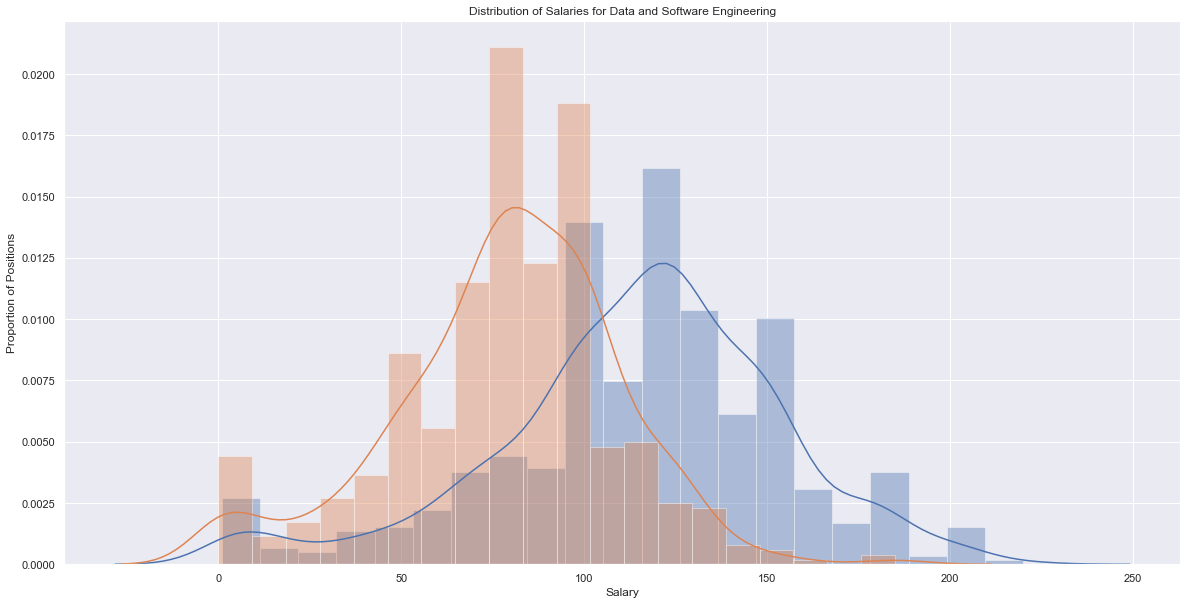

In [594]:
sns.distplot(good_location_df['salary_max'])
sns.distplot(good_location_df['salary_min'])
plt.xlabel('Salary')
plt.ylabel('Proportion of Positions')
plt.title('Distribution of Salaries for Data and Software Engineering')

In [561]:
city_count_dict = good_location_df['location'].value_counts()
city_count_dict = dict(city_count_dict)
city_count_keys = city_count_dict.values()
city_count_keys

dict_values([149, 110, 63, 58, 34, 33, 32, 21, 21, 14, 12, 10, 3, 3])

Text(0.5, 1.0, 'Count of Jobs for Data and Software Engineering')

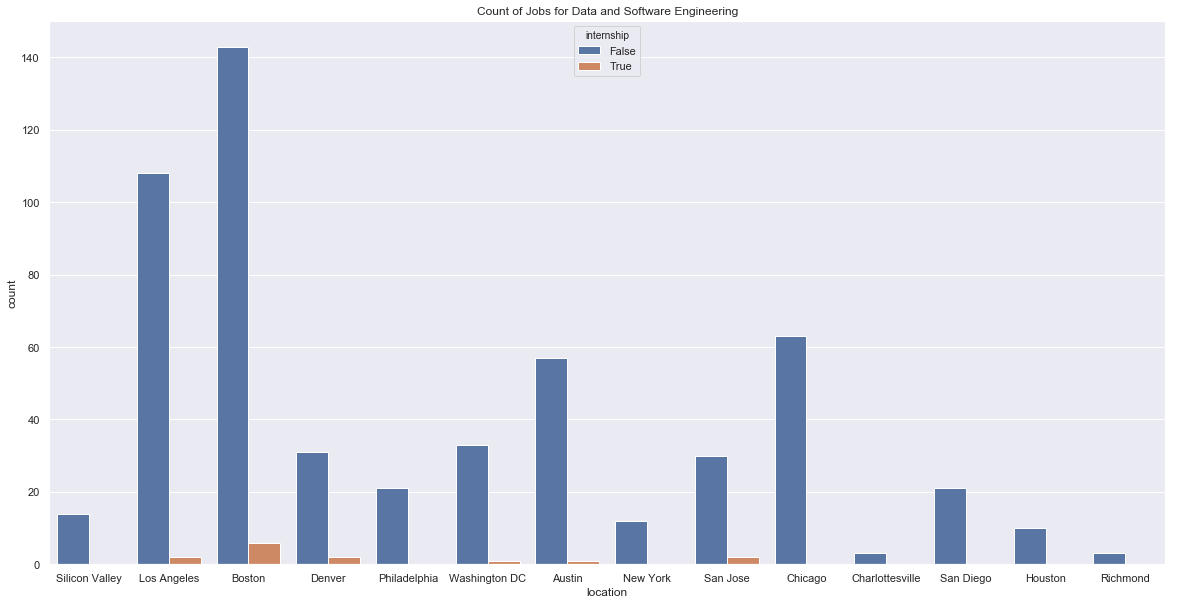

In [595]:
# internships by location
sns.set(rc={'figure.figsize':(20,10)})
good_location_df['internship'].value_counts()
sns.countplot(x=good_location_df['location'], hue=good_location_df['internship'])
plt.xticks(rotation=0)
plt.title('Count of Jobs for Data and Software Engineering')
# salaries of companies which offer internships
# internship salaries
# salaries of companies which offer data engineering jobs
# salaries seperated by data and 

In [603]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,None,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,None,False,[Silicon Valley],False,,"[Full Time , Silicon Valley , Data Scientist...",Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,None,True,[Los Angeles],False,"International, premium D2C products","[Internship , Los Angeles , Data Scientist]",Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,None,False,[Dallas],False,A Better Metal Buying Experience,"[Full Time , Dallas , Software Engineer , D...",Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,None,True,[New York City],False,Predictive Sentiment Analytics and Fundamental...,"[Internship , New York City , Designer , UI...","Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,None,False,[Boston],False,Building a more creative healthcare system.,"[Full Time , Remote possible , Boston , Sof...",Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,None,False,"[Bengaluru, Latvia, Europe, Delaware, India]",False,Kill the password,"[Full Time , Remote possible , Bengaluru , ...",7+ Years Data Scientist for next-generation au...,40,120
6,3,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,None,False,"[Vancouver, Bethesda, Bellevue, Portland]",False,SaaS - Business Intelligence and predictive an...,"[Full Time , Vancouver , Portland , Data Sc...",Principal Data Engineer,100,130
7,3,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,None,False,"[Milwaukee, La Verne, Edison, Remote, Chic...",False,"IRI believes in commitment, integrity and stra...","[Contract , La Verne , Data Scientist]",QA Documentation Specialist,70,75
8,1,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,None,False,"[San Francisco, San Francisco Bay Area, New ...",False,Certified product management courses in-person...,"[Contract , San Francisco , San Francisco Ba...","Data Analytics Instructor (5 hours/week), San ...",90,150
9,2,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,None,False,"[San Francisco, San Francisco Bay Area]",False,Pioneering mobile games and entertainment,"[Full Time , San Francisco , Data Scientist ...",Data Analyst,60,120


In [668]:
# result = result.drop(['rating', 'review', 'funding', 'salary'], axis=1)
data_split_location = result

In [610]:
result.sort_values('company')

,comp_size,company,contact,data_eng,data_science,desc,equity,internship,location,skills,software_eng,subtitle,tags,title,salary_min,salary_max,good_location
736,0,0x,0x.org,False,False,0x is a protocol for decentralized exchange. W...,0.03% – 0.07%,False,San Francisco,None,True,The protocol for decentralized exchange on the...,"[Full Time , San Francisco , Frontend Develo...",Front-end Engineer,120.0,175.0,False
1537,0,12traits,12traits.com,False,False,12traits is building a platform of human under...,0.5% – 2.0%,False,Berlin,None,True,Powering the future of player centricity,"[Full Time , San Diego , Berlin , Software ...",Senior Data Scientist,80.0,100.0,False
220,0,12traits,12traits.com,False,True,12traits is building a platform of human under...,0.5% – 2.0%,False,San Diego,None,False,Powering the future of player centricity,"[Full Time , San Diego , Berlin , Software ...",Senior Data Scientist,80.0,100.0,True
220,0,12traits,12traits.com,False,True,12traits is building a platform of human under...,0.5% – 2.0%,False,Berlin,None,False,Powering the future of player centricity,"[Full Time , San Diego , Berlin , Software ...",Senior Data Scientist,80.0,100.0,False
1537,0,12traits,12traits.com,False,False,12traits is building a platform of human under...,0.5% – 2.0%,False,San Diego,None,True,Powering the future of player centricity,"[Full Time , San Diego , Berlin , Software ...",Senior Data Scientist,80.0,100.0,True
1517,0,1787fp,1787fp.co,False,False,What We Do: 1787fp designs software to help mi...,0.125% – 1.0%,False,Washington DC,None,True,Powerful financial planning tools in your pocket!,"[Full Time , Arlington , Mobile Developer , ...",Software Engineer - iOS,75.0,120.0,False
1517,0,1787fp,1787fp.co,False,False,What We Do: 1787fp designs software to help mi...,0.125% – 1.0%,False,Arlington,None,True,Powerful financial planning tools in your pocket!,"[Full Time , Arlington , Mobile Developer , ...",Software Engineer - iOS,75.0,120.0,False
2018,0,180byTwo,180bytwo.com,False,False,180byTwo builds custom solutions leveraging da...,No equity,True,Tampa,None,True,Global Data Solutions for Marketers,"[Internship , Tampa , Clearwater , Saint Pe...",Software Engineer : Internship (PAID),18.0,25.0,False
2018,0,180byTwo,180bytwo.com,False,False,180byTwo builds custom solutions leveraging da...,No equity,True,Saint Petersburg,None,True,Global Data Solutions for Marketers,"[Internship , Tampa , Clearwater , Saint Pe...",Software Engineer : Internship (PAID),18.0,25.0,False
2018,0,180byTwo,180bytwo.com,False,False,180byTwo builds custom solutions leveraging da...,No equity,True,Clearwater,None,True,Global Data Solutions for Marketers,"[Internship , Tampa , Clearwater , Saint Pe...",Software Engineer : Internship (PAID),18.0,25.0,False


In [611]:
result.shape

(4626, 17)

In [612]:
data.shape

(2330, 16)

In [626]:
data

,comp_size,company,contact,data_eng,data_science,desc,equity,funding,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max
0,0,SecureStream Technologes,None,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,None,False,[Silicon Valley],False,,"[Full Time , Silicon Valley , Data Scientist...",Data Scientist,100,150
1,0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,None,True,[Los Angeles],False,"International, premium D2C products","[Internship , Los Angeles , Data Scientist]",Analytics Intern (SQL + Python + Excel),5,10
2,0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,None,False,[Dallas],False,A Better Metal Buying Experience,"[Full Time , Dallas , Software Engineer , D...",Head of Business Intelligence (Founding Employ...,110,130
3,0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,None,True,[New York City],False,Predictive Sentiment Analytics and Fundamental...,"[Internship , New York City , Designer , UI...","Interns (Marketing, PR, Product Development, D...",4,12
4,0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,None,False,[Boston],False,Building a more creative healthcare system.,"[Full Time , Remote possible , Boston , Sof...",Data Engineer (Semantic Knowledge Management),100,150
5,0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,None,False,"[Bengaluru, Latvia, Europe, Delaware, India]",False,Kill the password,"[Full Time , Remote possible , Bengaluru , ...",7+ Years Data Scientist for next-generation au...,40,120
6,3,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,None,False,"[Vancouver, Bethesda, Bellevue, Portland]",False,SaaS - Business Intelligence and predictive an...,"[Full Time , Vancouver , Portland , Data Sc...",Principal Data Engineer,100,130
7,3,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,None,False,"[Milwaukee, La Verne, Edison, Remote, Chic...",False,"IRI believes in commitment, integrity and stra...","[Contract , La Verne , Data Scientist]",QA Documentation Specialist,70,75
8,1,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,None,False,"[San Francisco, San Francisco Bay Area, New ...",False,Certified product management courses in-person...,"[Contract , San Francisco , San Francisco Ba...","Data Analytics Instructor (5 hours/week), San ...",90,150
9,2,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,None,False,"[San Francisco, San Francisco Bay Area]",False,Pioneering mobile games and entertainment,"[Full Time , San Francisco , Data Scientist ...",Data Analyst,60,120


In [637]:
score_metrics = ['comp_size', 'contact', 'data_eng', 'internship', 'salary_min', 'salary_max']
numeric_metrics = ['comp_size', 'salary_min', 'salary_max']

In [790]:
data_n = data.copy(True)
def normalize(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [792]:
normalize(data_n, numeric_metrics)

,comp_size,company,contact,data_eng,data_science,desc,equity,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max
0,0.0,SecureStream Technologes,NaN,False,True,We bring Privacy and Security to the IoT (Inte...,0.0% – 10.0%,False,[['Silicon Valley']],False,NaN,Full Time · Silicon Valley · Data Scientist · ...,Data Scientist,0.400,0.452888
1,0.0,Pangaea,pangaea.holdings,False,True,"We sell international-focused, premium consume...",No equity,True,[['Los Angeles']],False,"International, premium D2C products",Internship · Los Angeles · Data Scientist,Analytics Intern (SQL + Python + Excel),0.020,0.027356
2,0.0,SteelNow,steelnow.co,False,True,We are focused on getting you what you need ri...,No equity,False,[['Dallas']],False,A Better Metal Buying Experience,Full Time · Dallas · Software Engineer · Data ...,Head of Business Intelligence (Founding Employ...,0.440,0.392097
3,0.0,The TIE,thetie.io,False,True,The TIE is the first product to combine instit...,No equity,True,[['New York City']],False,Predictive Sentiment Analytics and Fundamental...,Internship · New York City · Designer · UI/UX ...,"Interns (Marketing, PR, Product Development, D...",0.016,0.033435
4,0.0,Reify Health,reifyhealth.com,False,True,Our healthcare system relies on clinical trial...,0.01% – 0.1%,False,[['Boston']],False,Building a more creative healthcare system.,Full Time · Remote possible · Boston · Softwar...,Data Engineer (Semantic Knowledge Management),0.400,0.452888
5,0.0,neoEYED,killthepassword.com,False,True,neoEYED is a package you install in your mobil...,0.0% – 2.0%,False,"[['Bengaluru', ' Latvia', ' Europe', ' Dela...",False,Kill the password,Full Time · Remote possible · Bengaluru · Dela...,7+ Years Data Scientist for next-generation au...,0.160,0.361702
6,0.6,DiscoverOrg,discoverorg.com,False,True,"For a decade, DiscoverOrg has stood alone in t...",No equity,False,"[['Vancouver', ' Bethesda', ' Bellevue', ' ...",False,SaaS - Business Intelligence and predictive an...,Full Time · Vancouver · Portland · Data Scient...,Principal Data Engineer,0.400,0.392097
7,0.6,Integrated Resources Inc ( IRI ),irionline.com,False,True,Staffing and Solutions,No equity,False,"[['Milwaukee', ' La Verne', ' Edison', ' Re...",False,"IRI believes in commitment, integrity and stra...",Contract · La Verne · Data Scientist,QA Documentation Specialist,0.280,0.224924
8,0.2,Product School,productschool.com,False,True,"Founded in Silicon Valley in 2014, Product Sch...",No equity,False,"[['San Francisco', ' San Francisco Bay Area',...",False,Certified product management courses in-person...,Contract · San Francisco · San Francisco Bay A...,"Data Analytics Instructor (5 hours/week), San ...",0.360,0.452888
9,0.4,Pocket Gems,pocketgems.com,False,True,"Pocket Gems, a leading mobile entertainment co...",0.0% – 0.01%,False,"[['San Francisco', ' San Francisco Bay Area']]",False,Pioneering mobile games and entertainment,Full Time · San Francisco · Data Scientist · P...,Data Analyst,0.240,0.361702


In [777]:
def score(df):
    score = 0.2*df['comp_size'] + 0.2*df['data_eng'] + 0.2*df['internship'] + 0.2*df['salary_min'] + 0.1*df['salary_max'] 
    return score

In [795]:
data["score"] = 0.2*data_n['comp_size'] + 0.2*data_n['data_eng'] + 0.2*data_n['internship'] + 0.2*data_n['salary_min'] + 0.1*data_n['salary_max'] 
data.sort_values('score', ascending=False)

,comp_size,company,contact,data_eng,data_science,desc,equity,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max,score
1914,5,KeHE Distributors,kehe.com,True,False,Our order fulfillment and distribution network...,No equity,False,[['Naperville']],False,Experienced engineers passionate about backend...,Full Time · Naperville · Backend Developer · S...,Senior Software Engineer (.NET),110,120,0.52417
3925,4,Palantir Technologies,palantir.com,True,False,"About us At Palantir, we're helping the world'...",No equity,False,"[Palo Alto, New York City, Seattle, London,...",False,Making products for human-driven analysis of r...,Full Time · New York City · Software Engineer,"Software Engineer, Deployment Infrastructure",135,175,0.520888
1191,1,Health Gorilla,healthgorilla.com,True,False,"Founded in 2014, Health Gorilla is a secure in...",0.2% – 0.5%,False,[['Sunnyvale']],False,Connecting the healthcare ecosystem on a secur...,Full Time · Sunnyvale · Software Architect · D...,Natural Language Processing (NLP) engineer,200,250,0.475684
202,1,Health Gorilla,healthgorilla.com,True,False,"Founded in 2014, Health Gorilla is a secure in...",0.2% – 0.5%,False,[['Sunnyvale']],False,Connecting the healthcare ecosystem on a secur...,Full Time · Sunnyvale · Software Architect · D...,Natural Language Processing (NLP) engineer,200,250,0.475684
2593,2,My Fitness Pal (Under Armour),careers.underarmour.com,True,False,https://www.myfitnesspal.com/,No equity,False,[San Francisco],False,World's largest nutrition and calorie database,Full Time · San Francisco · Software Architect...,"Senior Lead Software Engineer, Services",160,190,0.465447
2475,0,Rapidly,rapidly.co,True,False,Our app is changing the way underserved indivi...,No equity,True,[San Francisco],False,Turning the tax code and financial data into b...,Internship · San Francisco · Software Engineer...,Intern Software Engineer,30,40,0.435854
360,5,Citi,citi.com,False,True,Direct to consumer financial technology innova...,No equity,False,"[['New York City', ' Dallas', ' Wilmington',...",False,Customer centric new financial technology prod...,Full Time · Wilmington · Dallas · Fort Worth ·...,Head of Innovation and Capabilities (Data Mode...,200,250,0.435684
466,2,PlanGrid,plangrid.com,True,False,PlanGrid is on a mission to build the future f...,0.001% – 0.03%,False,"[['San Francisco', ' Houston', ' Los Angeles...",False,Bridging the gap between good software and the...,Full Time · San Francisco · Data Scientist,Data Scientist,110,160,0.416328
1698,0,Blushup,blushup.com,True,False,Online platform connecting consumers to beauty...,No equity,True,"[['San Francisco', ' Los Angeles County', ' ...",False,Online marketplace to discover and book in-sto...,Internship · Remote possible · New York City ·...,Full Stack Front End engineer- Summer Internship,1,3,0.401408
4021,1,Periscope Data,periscopedata.com,True,False,Periscope is a cloud data analysis tool that u...,0.03% – 0.07%,False,[San Francisco],False,"A powerful, flexible analytics platform for da...",Full Time · San Francisco · Software Engineer ...,"Full-Stack Engineer (Go, Ruby, React)",130,185,0.399927


In [789]:
good_location_df.sort_values('score', ascending=False)

,comp_size,company,contact,data_eng,data_science,desc,equity,internship,location,software_eng,subtitle,tags,title,salary_min,salary_max,good_location,score
3651,1,nClouds,nclouds.com,True,False,nClouds is an award-winning provider of AWS an...,No equity,False,San Jose,False,AWS and DevOps solution provider,Full Time · San Francisco · DevOps,DevOps engineer,100.0,180.0,True,0.589843
5026,4,Oscar Health,hioscar.com,False,False,"Oscar is a technology-driven, consumer-focused...",0.005% – 0.02%,False,Los Angeles,True,Refactor health care to build richer connectio...,Full Time · Los Angeles · Software Engineer · ...,Senior Software Engineer: Data/Systems (Los An...,125.0,180.0,True,0.56687
1914,4,Oscar Health,hioscar.com,False,True,"Oscar is a technology-driven, consumer-focused...",0.005% – 0.02%,False,Los Angeles,False,Refactor health care to build richer connectio...,Full Time · Los Angeles · Software Engineer · ...,Senior Software Engineer: Data/Systems (Los An...,125.0,180.0,True,0.56687
5673,0,Sentenai,sentenai.com,True,False,Traditional approaches to storing structured a...,0.5% – 1.5%,False,Boston,False,Working with sensor data is hard. Sentenai mak...,Full Time · Boston · Backend Developer · Haske...,Sr. Haskell Engineer,120.0,180.0,True,0.561465
6358,4,Opendoor,opendoor.com,False,False,Allowing owners to sell their home in a few cl...,0.1% – 10.0%,False,Los Angeles,True,A better way to buy and sell homes,Full Time · Los Angeles · Software Engineer · ...,Software Engineer (Mobile),120.0,170.0,True,0.556899
3246,4,Opendoor,opendoor.com,False,True,Allowing owners to sell their home in a few cl...,0.1% – 10.0%,False,Los Angeles,False,A better way to buy and sell homes,Full Time · Los Angeles · Software Engineer · ...,Software Engineer (Mobile),120.0,170.0,True,0.556899
3459,4,Open Listings,openlistings.com,False,True,"Open Listings is a better, online homebuying e...",No equity,False,Los Angeles,False,"Homebuying, the way it should be",Full Time · Los Angeles · Software Engineer · ...,Software Engineer,110.0,190.0,True,0.55522
6571,4,Open Listings,openlistings.com,False,False,"Open Listings is a better, online homebuying e...",No equity,False,Los Angeles,True,"Homebuying, the way it should be",Full Time · Los Angeles · Software Engineer · ...,Software Engineer,110.0,190.0,True,0.55522
6414,4,Toast Inc .,pos.toasttab.com,False,False,Point of Sale. Reimagined. Toast Point of Sale...,No equity,False,Boston,True,Cloud Base All-in-One Restaurant Management So...,Full Time · Boston · Software Engineer · Objec...,"Senior Software Engineer, Cash Management & Pa...",125.0,150.0,True,0.553172
3302,4,Toast Inc .,pos.toasttab.com,False,True,Point of Sale. Reimagined. Toast Point of Sale...,No equity,False,Boston,False,Cloud Base All-in-One Restaurant Management So...,Full Time · Boston · Software Engineer · Objec...,"Senior Software Engineer, Cash Management & Pa...",125.0,150.0,True,0.553172


In [796]:
good_location_df.to_csv(r'C:\Users\canea\Desktop\good_location_final.csv', index = None, header=True)
datacopy.to_csv(r'C:\Users\canea\Desktop\data_dull_final.csv', index = None, header=True)

In [802]:
data.title[data.data_science].nunique()

TypeError: ("unhashable type: 'list'", 'occurred at index location')

In [799]:
data.company.nunique()

2131